In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [496]:
df = pd.read_csv("dataset/train.csv")
test=pd.read_csv('dataset/test.csv')

In [497]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [498]:
# sns.heatmap(test.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [499]:
df.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)

In [500]:
# sns.heatmap(test.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [501]:
#Survival version
# sns.set_style('whitegrid')
# sns.countplot(x='Survived', data=df,palette='RdBu_r')

In [502]:
# Survival on the basis of gender
# sns.set_style('whitegrid')
# sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

In [503]:
# sns.set_style("whitegrid")
# sns.countplot(x="Survived", hue='Pclass',data=df,palette='rainbow')

In [504]:
# sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

In [505]:
# sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [506]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [507]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

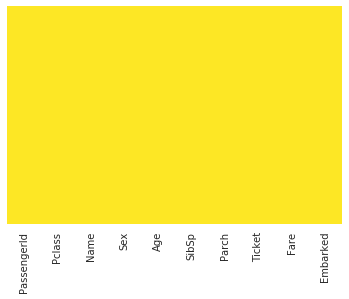

In [508]:
sns.heatmap(test.notnull(),yticklabels=False,cbar=False, cmap='viridis')

In [509]:
Y=df["Survived"]
test=test.fillna(test.mean())
id=test["PassengerId"]
df.drop(["PassengerId","Name","Ticket","Survived"],axis=1,inplace=True)
test.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [510]:
new_df=pd.get_dummies(df)
test_df=pd.get_dummies(test)
###########
Pclass_dummies=pd.get_dummies(df.Pclass,prefix='Pclass')
test_Pclass=pd.get_dummies(test_df.Pclass,prefix='Pclass')
new_df=pd.concat([new_df,Pclass_dummies],axis=1)
new_test=pd.concat([test_df,test_Pclass],axis=1)
new_df.drop("Pclass",axis=1,inplace=True)
new_test.drop("Pclass",axis=1,inplace=True)
############

In [511]:
new_df["fam"]=new_df["SibSp"]+new_df["Parch"]
new_test["fam"]=new_test["SibSp"]+new_test["Parch"]
new_df.drop(["SibSp","Parch"],axis=1,inplace=True)
new_test.drop(["SibSp","Parch"],axis=1,inplace=True)

In [512]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [513]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledRf', Pipeline([('Scaler', StandardScaler()),('Rf', RandomForestClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, new_df, Y, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.199750 (0.022658)
ScaledRf: -0.188489 (0.035728)
ScaledKNN: -0.187366 (0.030475)
ScaledCART: -0.217703 (0.044829)
ScaledGBM: -0.170562 (0.026711)


In [514]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(new_df)
rescaledX = scaler.transform(new_df)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingClassifier(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/home/ajay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


-0.167179 (0.038138) with: {'n_estimators': 50}
-0.170562 (0.026711) with: {'n_estimators': 100}
-0.164956 (0.031633) with: {'n_estimators': 200}
-0.163820 (0.038445) with: {'n_estimators': 300}
-0.160449 (0.037713) with: {'n_estimators': 400}
Best: -0.160449 using {'n_estimators': 400}


In [515]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(new_df)
rescaled_X_train = scaler.transform(new_df)
model = GradientBoostingClassifier(random_state=21, n_estimators=400)
model.fit(rescaled_X_train, Y)

# transform the validation dataset
rescaled_X_test = scaler.transform(new_test)
predictions = model.predict(rescaled_X_test)

In [516]:
# Rf.score(X_train,y_train)

In [517]:
# Rf.score(X_test,y_test)

In [518]:
# y_pred=Rf.predict(new_test)

In [519]:
submission = pd.DataFrame({
        "PassengerId": id,
        "Survived": predictions
    })
submission.to_csv('submission3.csv', index=False)